# Students’ Academic Performance Prediction using Data Mining 

#### Import libraries

In [130]:
import numpy as np # linear algebra
import csv
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

#### Labels According to G3 - final grade

The others (0–9, 9–15, and 15–20) correspond to  C (poor), B (average), and A (good) class labels, respectively.

####   Dataset Pre-processing

In [131]:
data_path1 = 'student-por.csv'
data_path2 = 'student-mat.csv'

In [132]:
rows = []
with open(data_path1) as infile:
    count=0
    # Create a new reader
    reader = csv.reader(infile) 
    #next(reader) # Skip the first row
    for row in reader:
        row_1=[i.replace("\"", "") for i in row[0].split(";")]       
        if(count!=0):
            target=int(row_1[32])
            if(0<=target<9):
                row_1[32]="C"
            elif(9<=target<15):
                row_1[32]="B"
            else:
                row_1[32]="A"
        rows.append(row_1)
        count=1



In [133]:
with open(data_path2) as infile:
    count=0
    # Create a new reader
    reader = csv.reader(infile) 
    #next(reader) # Skip the first row
    for row in reader:
        row_1=[i.replace("\"", "") for i in row[0].split(";")]       
        if(count!=0):
            target=int(row_1[32])
            if(0<=target<9):
                row_1[32]="C"
            elif(9<=target<15):
                row_1[32]="B"
            else:
                row_1[32]="A"
        rows.append(row_1)
        count=1

In [134]:
a = np.array(rows)
with open('formatted_data.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(a)

#### Import dataset

In [135]:
df = pd.read_csv('formatted_data.csv')


#### Exploratory data analysis 

In [136]:
# view dimensions of dataset
df.shape

(1045, 33)

In [161]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [137]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,B


#### Missing values in variables

In [138]:
# check missing values in variables
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

####  Declare feature vector and target variable

In [139]:
X = df.drop(['G3'], axis=1)
y = df['G3']

In [177]:
df['G3']

0       B
1       B
2       B
3       B
4       B
       ..
1040    B
1041    A
1042    C
1043    B
1044    B
Name: G3, Length: 1045, dtype: object

#### Split data into separate training and test set

In [140]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [141]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((783, 32), (262, 32))

In [162]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [163]:
# print(X_train_scaled)
# print(X_test_scaled)

[[-0.57390924  1.14443633  0.23526501 ... -1.02510265 -0.87865572
  -0.8613454 ]
 [-0.57390924  1.14443633 -0.56915639 ... -0.16499188  1.69614754
   1.3780573 ]
 [ 1.74243579  1.14443633 -1.37357778 ... -0.76706942 -0.70700217
  -1.04796229]
 ...
 [ 1.74243579  1.14443633 -1.37357778 ... -1.02510265 -1.05030927
   1.75129108]
 [-0.57390924  1.14443633 -1.37357778 ...  1.4692186  -0.36369507
  -0.48811161]
 [-0.57390924 -0.8737926   1.84410779 ... -0.85308049  1.52449399
   1.56467419]]
[[-0.57390924  1.14443633 -0.56915639 ... -0.25100295 -0.53534862
  -0.8613454 ]
 [-0.57390924  1.14443633  1.0396864  ...  0.6951189  -1.22196282
   1.3780573 ]
 [ 1.74243579 -0.8737926   0.23526501 ...  0.35107459  1.00953333
   1.19144041]
 ...
 [-0.57390924  1.14443633 -0.56915639 ...  0.35107459 -0.87865572
  -0.8613454 ]
 [-0.57390924 -0.8737926  -1.37357778 ... -0.16499188 -0.70700217
  -0.48811161]
 [-0.57390924  1.14443633 -0.56915639 ... -0.16499188  1.35284044
   1.3780573 ]]


In [164]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

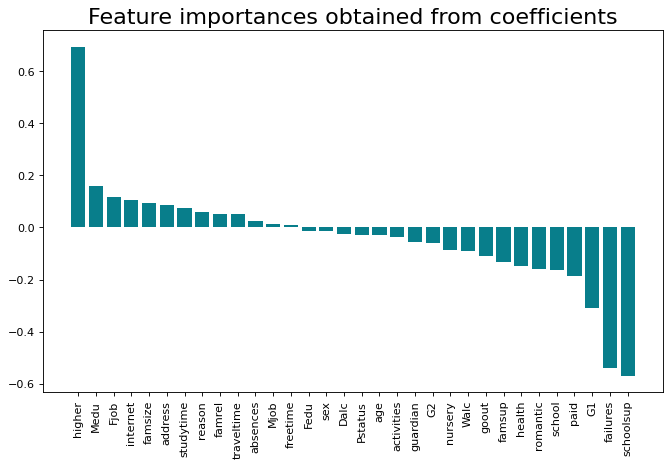

In [174]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [179]:

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

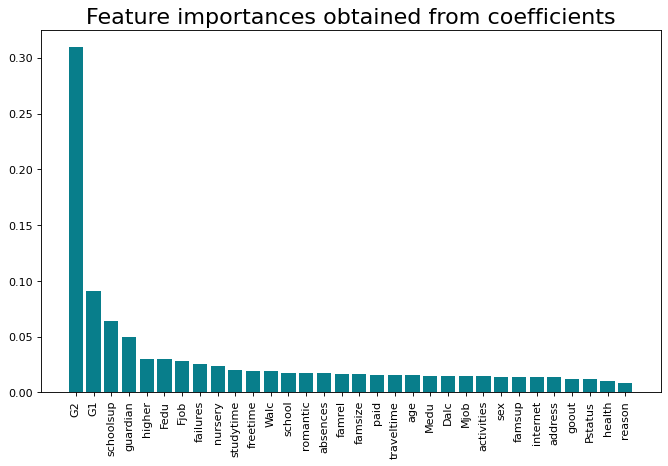

In [181]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [142]:
# check data in X_train
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
307,GP,M,17,U,GT3,T,3,1,services,other,...,yes,5,4,4,3,4,5,0,11,11
884,GP,M,16,U,LE3,T,1,1,other,other,...,no,3,4,2,1,1,5,18,9,7
477,MS,M,15,U,GT3,T,3,3,services,services,...,no,4,3,3,2,4,3,11,12,10
849,GP,F,16,U,LE3,T,4,4,teacher,teacher,...,no,4,5,2,1,2,3,0,9,9
601,MS,F,18,U,GT3,T,2,2,other,other,...,yes,1,3,1,1,1,2,4,8,8


#### Encode categorical variables

In [149]:
# !pip install category_encoders

In [150]:
labelencoder = LabelEncoder()
X_train = X_train.apply(labelencoder.fit_transform)
X_test = X_test.apply(labelencoder.fit_transform)


In [151]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
307,0,1,2,1,0,1,3,1,3,2,...,1,4,3,3,2,3,4,0,2,2
884,0,1,1,1,1,1,1,1,2,2,...,0,2,3,1,0,0,4,10,17,14
477,1,1,0,1,0,1,3,3,3,3,...,0,3,2,2,1,3,2,3,3,1
849,0,0,1,1,1,1,4,4,4,4,...,0,3,4,1,0,1,2,0,17,16
601,1,0,3,1,0,1,2,2,2,2,...,1,0,2,0,0,0,1,24,16,15


In [152]:

X_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
773,0,1,1,1,0,2,4,4,2,3,...,0,2,3,3,0,3,4,9,4,2
280,0,1,3,0,1,2,3,3,3,4,...,2,3,2,2,0,2,4,20,0,14
629,1,0,2,0,0,2,1,2,3,3,...,0,2,4,4,0,2,0,16,13,13
318,0,0,3,0,0,0,3,2,3,4,...,2,3,0,0,0,0,4,7,2,14
1008,1,1,3,1,1,2,1,1,3,4,...,2,2,2,1,0,1,2,16,0,1


#### Decision Tree Classifier with criterion gini index 

In [153]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=1)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=1)

#### Predict the Test set results with criterion gini index

In [154]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'C', 'C',
       'B', 'B', 'B', 'B', 'C', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'A',
       'A', 'B', 'B', 'B', 'B', 'A', 'B', 'C', 'B', 'A', 'B', 'B', 'B',
       'B', 'C', 'A', 'A', 'B', 'B', 'C', 'C', 'A', 'B', 'B', 'B', 'A',
       'A', 'C', 'B', 'B', 'C', 'B', 'C', 'A', 'B', 'B', 'B', 'B', 'A',
       'C', 'B', 'B', 'C', 'A', 'A', 'A', 'B', 'C', 'B', 'C', 'A', 'B',
       'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'C', 'B', 'A', 'C', 'B', 'B', 'B', 'C', 'B', 'B', 'B',
       'B', 'A', 'B', 'C', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B',
       'B', 'B', 'A', 'C', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'A', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'A',
       'A', 'A', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'B',
       'B', 'C', 'A', 'C', 'B', 'B', 'B', 'A', 'C', 'B', 'B', 'C', 'B',
       'B', 'C', 'B', 'B', 'B', 'C', 'A', 'C', 'C', 'B', 'B', 'B

#### Check accuracy score with criterion gini index

In [155]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}%'. format(accuracy_score(y_test, y_pred_gini)*100))

Model accuracy score with criterion gini index: 82.8244%


#### Visualize decision-trees

In [156]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X_train.columns,   
                                special_characters=True,
                                filled=True)

In [829]:
deci_tree=graphviz.Source(dot_data,format='jpg')
deci_tree.save(filename='deci_tree.jpg')
deci_tree.render(filename='deci_tree')


'deci_tree.jpg'

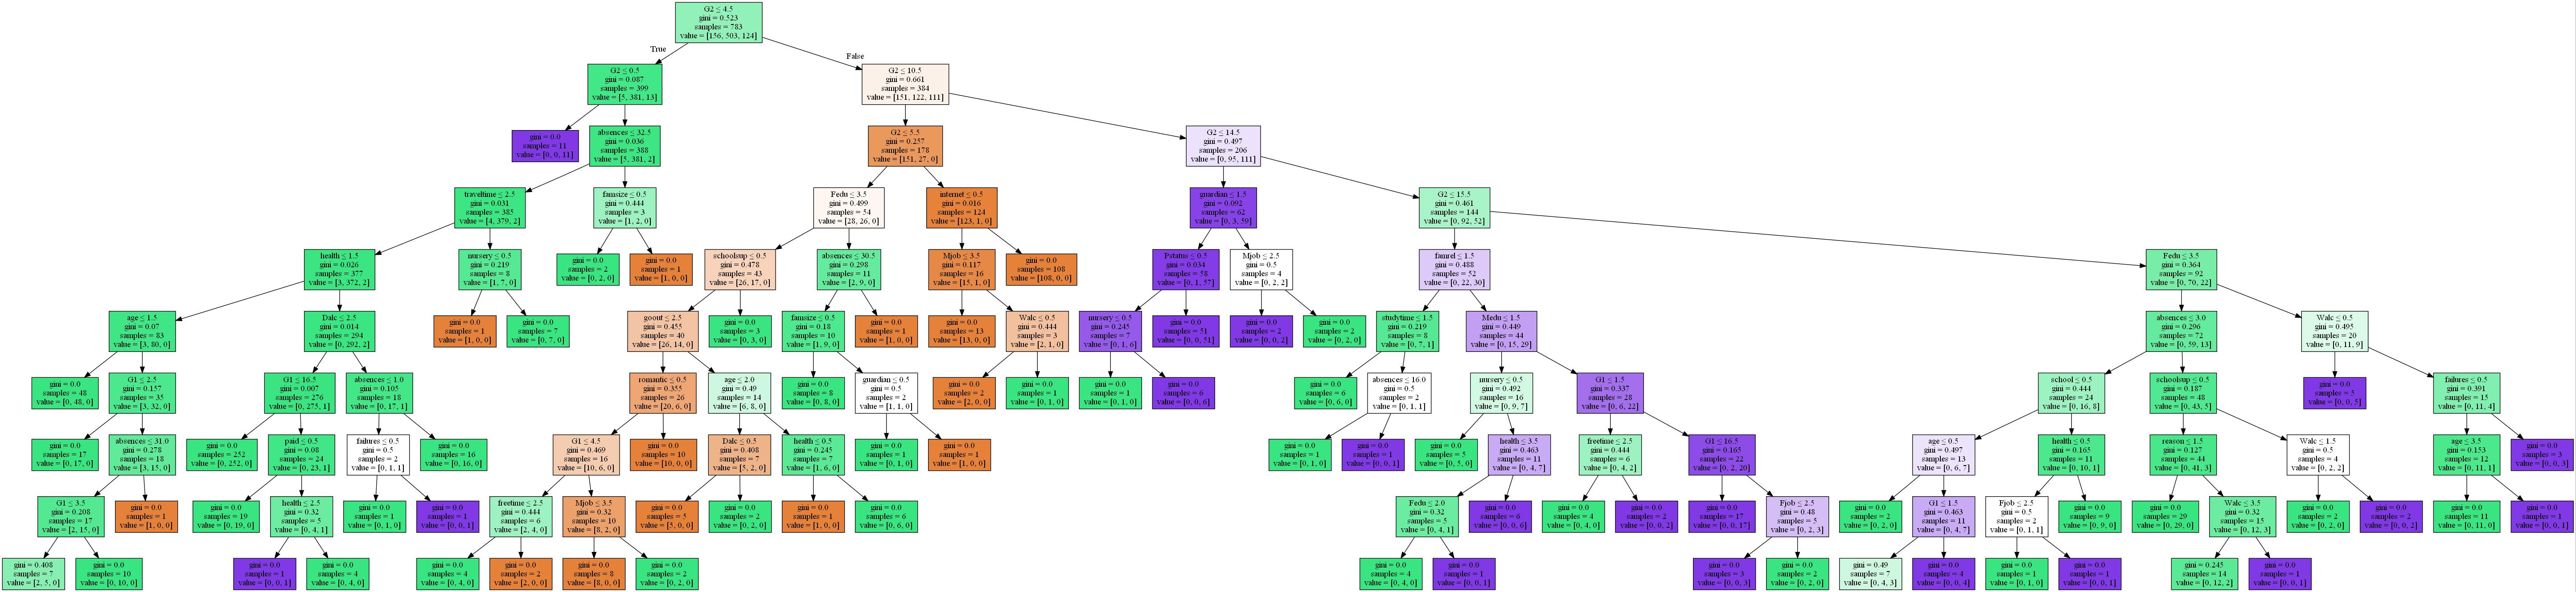

In [830]:
from IPython.display import Image
Image(filename='deci_tree.jpg', width=1000)

## Changing the max_depth

In [157]:
train_depth_accuracy=[]
test_depth_accuracy=[]
for depth in range(1,10):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    # fit the model
    clf_gini.fit(X_train, y_train)
    y_pred_test_gini = clf_gini.predict(X_test)   
    test_depth_accuracy.append(accuracy_score(y_test, y_pred_test_gini))
    
    y_pred_train_gini = clf_gini.predict(X_train)   
    train_depth_accuracy.append(accuracy_score(y_train, y_pred_train_gini))


In [158]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_depth_accuracy,'test_acc':test_depth_accuracy})

In [159]:
frame.head()

,max_depth,train_acc,test_acc
0,1,0.679438,0.648855
1,2,0.835249,0.797710
2,3,0.886335,0.797710
3,4,0.906769,0.824427
4,5,0.923372,0.801527


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


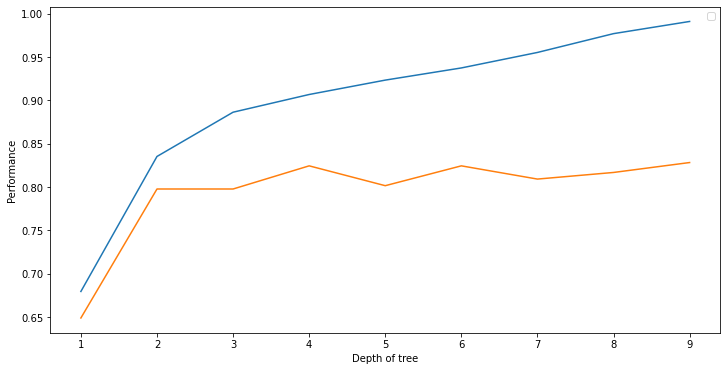

In [160]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'])
plt.plot(frame['max_depth'],frame['test_acc'])
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()